In [14]:
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
from pycocotools.coco import COCO
import os
import numpy as np
#import cv2
import params

In [15]:
def visualizer(image_path,bbox_cords_list,labels_list,save_image_name):
    loaded_image = Image.open(image_path).convert("RGB")
    #width, height = loaded_image.size
    #size=(int(width/4), int(height/4))
    #loaded_image = loaded_image.resize(size)
    
    
    classes=['ignored region', 'swimmer', 'floater', 'swimmer on boat', 'floater on boat', 'boat', 'life jacket']
    colors = np.random.uniform(0, 255, size=(params.NUM_OF_CLASSES))
    for i, box in enumerate(bbox_cords_list):
        draw = ImageDraw.Draw(loaded_image)
        
        draw.rectangle([(int(box[0]), int(box[1])), (int(box[0]+box[2]), int(box[1]+box[3]))], outline=int(colors[labels_list[i]]),width=10)

        #draw.text((int(box[0]), int(box[1])), classes[labels_list[i]], fill='black',font=ImageFont.truetype('FreeMono.ttf', 65))
    loaded_image.show()
    loaded_image.save(os.path.join(params.OUTPUT_DIR,'{}.png'.format(save_image_name)))
        
        
        #cv2.rectangle(np.array(loaded_image), (int(box[0]), int(box[1])), (int(box[0]+box[2]), int(box[1]-box[3])), (0, 0, 255), 2)
        #cv2.putText(np.array(loaded_image), classes[labels_list[i]], (int(box[0]), int(box[1]-5)),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, lineType=cv2.LINE_AA)
    #cv2.imshow('Prediction', np.array(loaded_image))
    #cv2.imwrite(os.path.join(params.OUTPUT_DIR,'{}.png'.format(save_image_name)), np.array(loaded_image))

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


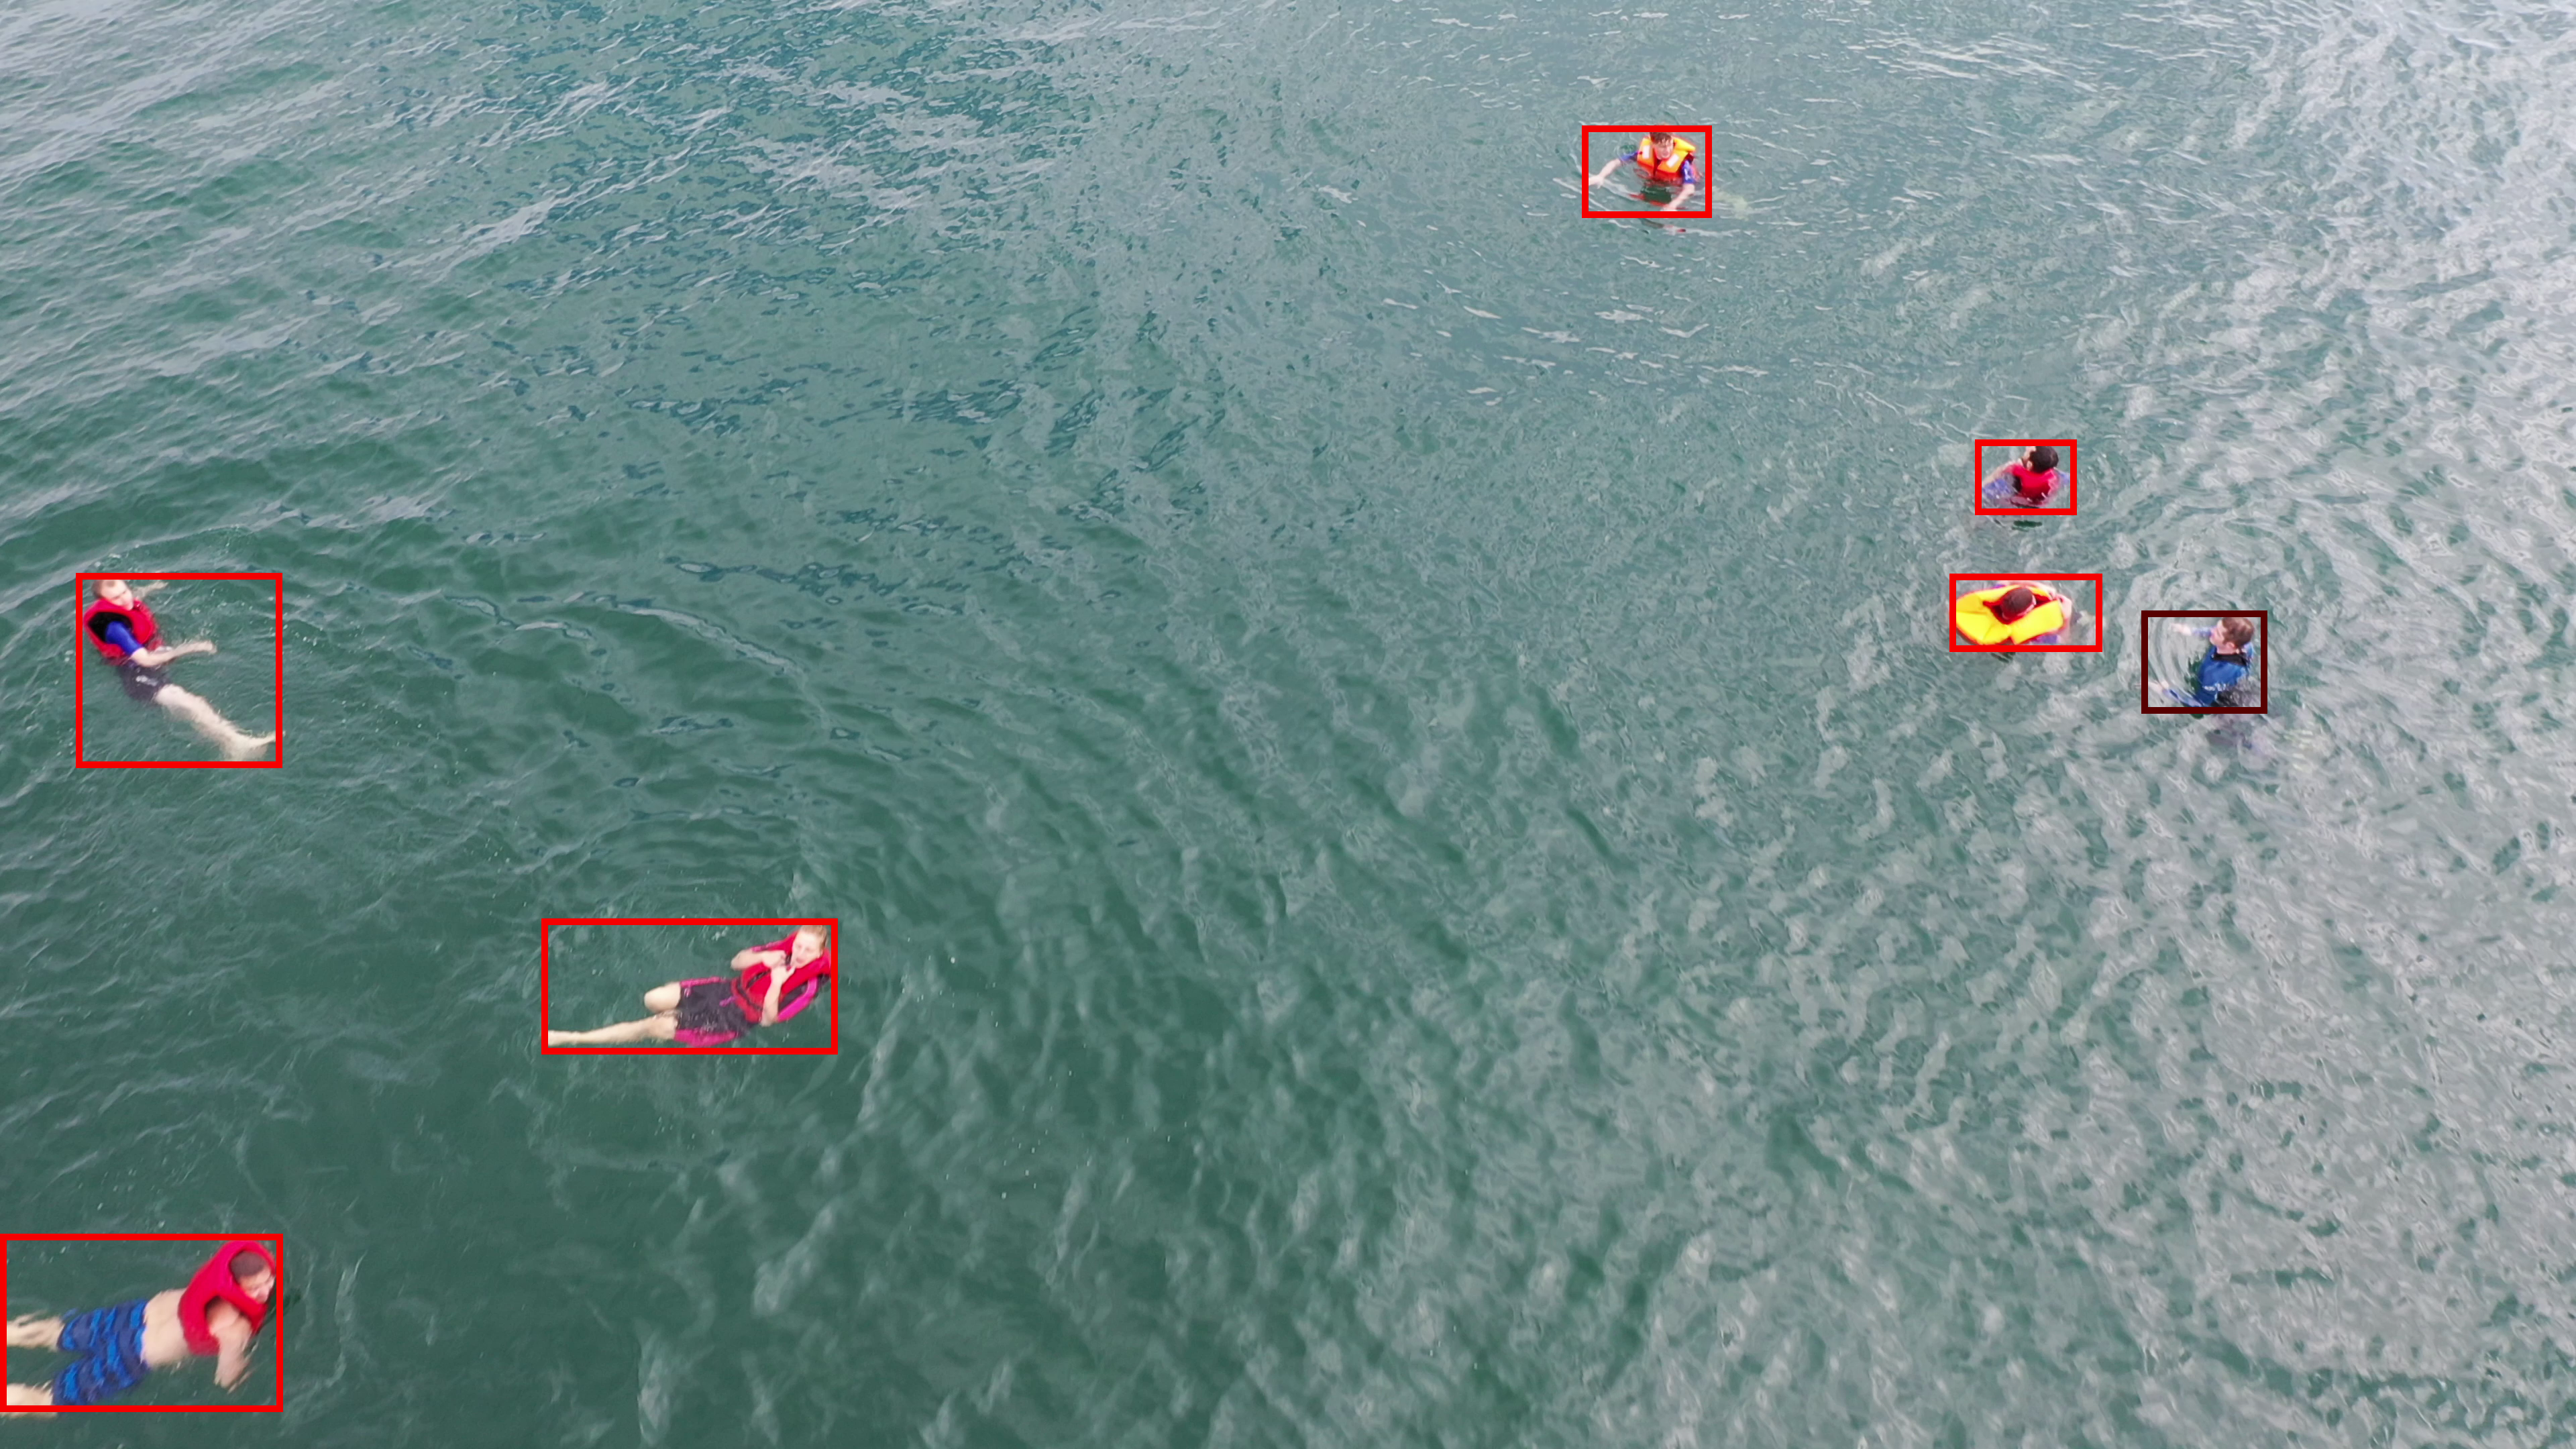

In [16]:
coco_annotation = COCO(annotation_file=os.path.join(params.PARENT_DIR,'annotations/instances_val.json'))
image_ids = coco_annotation.getImgIds()
image_id = image_ids[0]
image_metadata = coco_annotation.loadImgs([image_id])
path_for_image=os.path.join(params.PARENT_DIR,'images/val',image_metadata[0]['file_name'])

bbox_coords, labels=[],[]
annotation_ids = coco_annotation.getAnnIds(imgIds=[image_id])
annotations_for_image = coco_annotation.loadAnns(annotation_ids)
for annotation in annotations_for_image:
    bbox_coords.append(annotation['bbox'])
    labels.append(annotation['category_id'])

#'/home/bernivas/CompVis_project/data/sea_drones_see_detection/images/val/991.png'
visualizer(path_for_image,bbox_coords,labels,'meg semmi') #ezt majd változtatni